### KULLANILAN KÜTÜPHANELER

- import numpy as np --->
büyük sayılar ve hesaplamalar için kullanılır

- import matplotlib.pyplot as plt --->
çizimler için kullanılır

- import pandas as pd --->
verileri düzgün bir biçimde tutabilmek veri çerçevelerinde tutabilmek ve erişebilmek için kullanılır

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
veriler = pd.read_csv('C:\\Users\\M E L S A\Desktop\\M E L S A\\data_science\\datasciencetemp\\data\\satis\\eksik veriler.csv') 
#verinin nerede oldugunu yazarsin ve orada o veriyi okur.
print(veriler)

   ulke  boy  kilo   yas cinsiyet
0    tr  130    30  10.0        e
1    tr  125    36  11.0        e
2    tr  135    34  10.0        k
3    tr  133    30   9.0        k
4    tr  129    38  12.0        e
5    tr  180    90  30.0        e
6    tr  190    80  25.0        e
7    tr  175    90  35.0        e
8    tr  177    60  22.0        k
9    us  185   105  33.0        e
10   us  165    55  27.0        k
11   us  155    50  44.0        k
12   us  160    58   NaN        k
13   us  162    59  41.0        k
14   us  167    62  55.0        k
15   fr  174    70  47.0        e
16   fr  193    90   NaN        e
17   fr  187    80  27.0        e
18   fr  183    88  28.0        e
19   fr  159    40  29.0        k
20   fr  164    66  32.0        k
21   fr  166    56  42.0        k


In [7]:
#eksik veriler
#sci - kit learn
from sklearn.impute import SimpleImputer #imputer eksik verileri doldurma yöntemleri barındıran bir objedir

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #bu kisimda eksik bilgilerin oldugu yere NaN yaz demektir.
#strategy = mean demek eksik verilerde ortalamayı bulup boş yerleri doldur demek.
Yas = veriler.iloc[:,1:4].values #hangi kolonlari alacagima dair alt bir function (iloc)
#1. kolondan başla 4. kolona kadar (dahil değil) al.
print(Yas)

[[130.  30.  10.]
 [125.  36.  11.]
 [135.  34.  10.]
 [133.  30.   9.]
 [129.  38.  12.]
 [180.  90.  30.]
 [190.  80.  25.]
 [175.  90.  35.]
 [177.  60.  22.]
 [185. 105.  33.]
 [165.  55.  27.]
 [155.  50.  44.]
 [160.  58.  nan]
 [162.  59.  41.]
 [167.  62.  55.]
 [174.  70.  47.]
 [193.  90.  nan]
 [187.  80.  27.]
 [183.  88.  28.]
 [159.  40.  29.]
 [164.  66.  32.]
 [166.  56.  42.]]


In [8]:
imputer = imputer.fit(Yas[:,1:4]) #varolan diger yas verilerinin ortlamasini bulur. strategy neyi istiyorsa fit onu yapar burada mean ile ortalamaları almasını istiyor.
Yas[:,1:4] = imputer.transform(Yas[:,1:4]) #transfor ile eksik verilere bulunan ortalamayi yazarak veriyi değiştirmeyi sağlar.
print(Yas)

[[130.    30.    10.  ]
 [125.    36.    11.  ]
 [135.    34.    10.  ]
 [133.    30.     9.  ]
 [129.    38.    12.  ]
 [180.    90.    30.  ]
 [190.    80.    25.  ]
 [175.    90.    35.  ]
 [177.    60.    22.  ]
 [185.   105.    33.  ]
 [165.    55.    27.  ]
 [155.    50.    44.  ]
 [160.    58.    28.45]
 [162.    59.    41.  ]
 [167.    62.    55.  ]
 [174.    70.    47.  ]
 [193.    90.    28.45]
 [187.    80.    27.  ]
 [183.    88.    28.  ]
 [159.    40.    29.  ]
 [164.    66.    32.  ]
 [166.    56.    42.  ]]


In [9]:
ulke = veriler.iloc[:,0:1].values #integer location (iloc) : 0 ile 1 arasında kalan kolondaki tüm satırları al demek
print(ulke)

[['tr']
 ['tr']
 ['tr']
 ['tr']
 ['tr']
 ['tr']
 ['tr']
 ['tr']
 ['tr']
 ['us']
 ['us']
 ['us']
 ['us']
 ['us']
 ['us']
 ['fr']
 ['fr']
 ['fr']
 ['fr']
 ['fr']
 ['fr']
 ['fr']]


In [10]:
from sklearn import preprocessing #from sklearn.preprocessing import LabelEncoder yazarsan da olur.
#LabelEncoder her bir ülke için sayısal değer karşılığı koyan bir encoderdır.
le = preprocessing.LabelEncoder() #secili her bir variable için bir sayisal deger gonderen LabelEncoder objesi oluşturuldu.
ulke[:,0] = le.fit_transform(veriler.iloc[:,0]) #ülkenin belirli konumlarda (0.kolon) hem uygular(fit) hem de sonucu yazar (transform).
print(ulke)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [11]:
#from sklearn.preprocessing import OneHotEncoder eger 10. satir diyez önündeki olsaydı bunu eklemek mecburiyetindeydik.
ohe = preprocessing.OneHotEncoder() #ulkeleri en üst satıra alır ve ülkenin değerine göre 1 koyar geriye kalan ülkelere 0 değerini koyar.
ulke = ohe.fit_transform(ulke).toarray()
print(ulke)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [12]:
#numpy dizileri dataframe dönüşümü
print(list(range(22))) #ulkelerin bulundugu kisim bir array ve 22 tane elemanimiz var bu sekilde onları listeleyip yazdirabiliriz.
sonuc = pd.DataFrame(data=ulke, index = range(22), columns = ['fr','tr','us']) #pandas kütüphanesinden yararlanarak dataframe objesi oluşturuldu.
print(sonuc)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
     fr   tr   us
0   0.0  1.0  0.0
1   0.0  1.0  0.0
2   0.0  1.0  0.0
3   0.0  1.0  0.0
4   0.0  1.0  0.0
5   0.0  1.0  0.0
6   0.0  1.0  0.0
7   0.0  1.0  0.0
8   0.0  1.0  0.0
9   0.0  0.0  1.0
10  0.0  0.0  1.0
11  0.0  0.0  1.0
12  0.0  0.0  1.0
13  0.0  0.0  1.0
14  0.0  0.0  1.0
15  1.0  0.0  0.0
16  1.0  0.0  0.0
17  1.0  0.0  0.0
18  1.0  0.0  0.0
19  1.0  0.0  0.0
20  1.0  0.0  0.0
21  1.0  0.0  0.0


In [13]:
sonuc2 = pd.DataFrame(data=Yas, index = range(22), columns = ['boy','kilo','yas'])
print(sonuc2)

      boy   kilo    yas
0   130.0   30.0  10.00
1   125.0   36.0  11.00
2   135.0   34.0  10.00
3   133.0   30.0   9.00
4   129.0   38.0  12.00
5   180.0   90.0  30.00
6   190.0   80.0  25.00
7   175.0   90.0  35.00
8   177.0   60.0  22.00
9   185.0  105.0  33.00
10  165.0   55.0  27.00
11  155.0   50.0  44.00
12  160.0   58.0  28.45
13  162.0   59.0  41.00
14  167.0   62.0  55.00
15  174.0   70.0  47.00
16  193.0   90.0  28.45
17  187.0   80.0  27.00
18  183.0   88.0  28.00
19  159.0   40.0  29.00
20  164.0   66.0  32.00
21  166.0   56.0  42.00


In [14]:
cinsiyet = veriler.iloc[:,-1].values #son veriyi aliyor.
print(cinsiyet)

['e' 'e' 'k' 'k' 'e' 'e' 'e' 'e' 'k' 'e' 'k' 'k' 'k' 'k' 'k' 'e' 'e' 'e'
 'e' 'k' 'k' 'k']


In [15]:
sonuc3 = pd.DataFrame(data = cinsiyet, index = range(22), columns = ['cinsiyet'])
print(sonuc3)

   cinsiyet
0         e
1         e
2         k
3         k
4         e
5         e
6         e
7         e
8         k
9         e
10        k
11        k
12        k
13        k
14        k
15        e
16        e
17        e
18        e
19        k
20        k
21        k


In [16]:
#dataframe birleştirme işlemi
s=pd.concat([sonuc,sonuc2], axis=1) #eklemek anlamina gelir iki veriyi birleştirmesi
print(s)

     fr   tr   us    boy   kilo    yas
0   0.0  1.0  0.0  130.0   30.0  10.00
1   0.0  1.0  0.0  125.0   36.0  11.00
2   0.0  1.0  0.0  135.0   34.0  10.00
3   0.0  1.0  0.0  133.0   30.0   9.00
4   0.0  1.0  0.0  129.0   38.0  12.00
5   0.0  1.0  0.0  180.0   90.0  30.00
6   0.0  1.0  0.0  190.0   80.0  25.00
7   0.0  1.0  0.0  175.0   90.0  35.00
8   0.0  1.0  0.0  177.0   60.0  22.00
9   0.0  0.0  1.0  185.0  105.0  33.00
10  0.0  0.0  1.0  165.0   55.0  27.00
11  0.0  0.0  1.0  155.0   50.0  44.00
12  0.0  0.0  1.0  160.0   58.0  28.45
13  0.0  0.0  1.0  162.0   59.0  41.00
14  0.0  0.0  1.0  167.0   62.0  55.00
15  1.0  0.0  0.0  174.0   70.0  47.00
16  1.0  0.0  0.0  193.0   90.0  28.45
17  1.0  0.0  0.0  187.0   80.0  27.00
18  1.0  0.0  0.0  183.0   88.0  28.00
19  1.0  0.0  0.0  159.0   40.0  29.00
20  1.0  0.0  0.0  164.0   66.0  32.00
21  1.0  0.0  0.0  166.0   56.0  42.00


In [17]:
s2=pd.concat([s,sonuc3], axis=1)
print(s2)

     fr   tr   us    boy   kilo    yas cinsiyet
0   0.0  1.0  0.0  130.0   30.0  10.00        e
1   0.0  1.0  0.0  125.0   36.0  11.00        e
2   0.0  1.0  0.0  135.0   34.0  10.00        k
3   0.0  1.0  0.0  133.0   30.0   9.00        k
4   0.0  1.0  0.0  129.0   38.0  12.00        e
5   0.0  1.0  0.0  180.0   90.0  30.00        e
6   0.0  1.0  0.0  190.0   80.0  25.00        e
7   0.0  1.0  0.0  175.0   90.0  35.00        e
8   0.0  1.0  0.0  177.0   60.0  22.00        k
9   0.0  0.0  1.0  185.0  105.0  33.00        e
10  0.0  0.0  1.0  165.0   55.0  27.00        k
11  0.0  0.0  1.0  155.0   50.0  44.00        k
12  0.0  0.0  1.0  160.0   58.0  28.45        k
13  0.0  0.0  1.0  162.0   59.0  41.00        k
14  0.0  0.0  1.0  167.0   62.0  55.00        k
15  1.0  0.0  0.0  174.0   70.0  47.00        e
16  1.0  0.0  0.0  193.0   90.0  28.45        e
17  1.0  0.0  0.0  187.0   80.0  27.00        e
18  1.0  0.0  0.0  183.0   88.0  28.00        e
19  1.0  0.0  0.0  159.0   40.0  29.00  

In [18]:
#verilerin eğitim ve test verileri için bölünmesi
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(s,sonuc3,test_size = 0.33, random_state = 0)

In [19]:
from sklearn import preprocessing #from sklearn.preprocessing import StandardScaler yazarsan da olur.
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

#### Aylara Göre Satışlar Veriseti Linear Regression

In [22]:
veriler = pd.read_csv('C:\\Users\\M E L S A\Desktop\\M E L S A\\data_science\\datasciencetemp\\data\\satis\\Aylara göre Satis Verileri.csv') 
print(veriler)

    Aylar  Satislar
0       8   19671.5
1      10   23102.5
2      11   18865.5
3      13   21762.5
4      14   19945.5
5      19   28321.0
6      19   30075.0
7      20   27222.5
8      20   32222.5
9      24   28594.5
10     25   31609.0
11     25   27897.0
12     25   28478.5
13     26   28540.5
14     29   30555.5
15     31   33969.0
16     32   33014.5
17     34   41544.0
18     37   40681.5
19     37    4697.0
20     42   45869.0
21     44   49136.5
22     49   50651.0
23     50   56906.0
24     54   54715.5
25     55   52791.0
26     59   58484.5
27     59   56317.5
28     64   61195.5
29     65   60936.0


In [23]:
aylar = veriler[['Aylar']]
print(aylar) 
satislar = veriler[['Satislar']]
print(satislar)

    Aylar
0       8
1      10
2      11
3      13
4      14
5      19
6      19
7      20
8      20
9      24
10     25
11     25
12     25
13     26
14     29
15     31
16     32
17     34
18     37
19     37
20     42
21     44
22     49
23     50
24     54
25     55
26     59
27     59
28     64
29     65
    Satislar
0    19671.5
1    23102.5
2    18865.5
3    21762.5
4    19945.5
5    28321.0
6    30075.0
7    27222.5
8    32222.5
9    28594.5
10   31609.0
11   27897.0
12   28478.5
13   28540.5
14   30555.5
15   33969.0
16   33014.5
17   41544.0
18   40681.5
19    4697.0
20   45869.0
21   49136.5
22   50651.0
23   56906.0
24   54715.5
25   52791.0
26   58484.5
27   56317.5
28   61195.5
29   60936.0


In [24]:
from sklearn.model_selection import train_test_split #from sklearn.cross_validation import train_test_split
x_train , x_test , y_train, y_test = train_test_split(aylar,satislar,test_size = 0.33, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)
Y_train = sc.fit_transform(y_train)
Y_test = sc.fit_transform(y_test)

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train) #burada x_train ile y_train eğitim verisi birbirine uyduruluyor.
tahmin = lr.predict(x_test) #burada bir üstte verilen eğitim verilerinden yararlanarak x_test verisinden bir tahmin oluşturuluyor bu tahmin y_test verisinin tahminidir..

Text(0, 0.5, 'Satışlar')

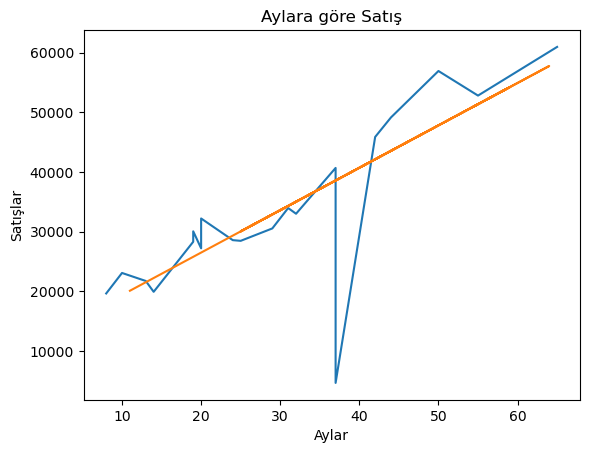

In [27]:
x_train = x_train.sort_index() #veriler sıraya sokuluyor çünkü grafikte sıralı olarak bir görüntü oluşturulması için gerekli.
y_train = y_train.sort_index()
# plot grafik oluşturulur
plt.plot(x_train , y_train) 
plt.plot(x_test , lr.predict(x_test))
plt.title("Aylara göre Satış")
plt.xlabel("Aylar")
plt.ylabel("Satışlar")

#### Eksik Veriler Verisetinde Makine Öğrenmesi ve Kategoric veriyi Numeric Veriye Dönüştürme

In [28]:
veriler = pd.read_csv('C:\\Users\\M E L S A\Desktop\\M E L S A\\data_science\\datasciencetemp\\data\\satis\\eksik veriler.csv') 
#verinin nerede oldugunu yazarsin ve orada o veriyi okur.
print(veriler)

   ulke  boy  kilo   yas cinsiyet
0    tr  130    30  10.0        e
1    tr  125    36  11.0        e
2    tr  135    34  10.0        k
3    tr  133    30   9.0        k
4    tr  129    38  12.0        e
5    tr  180    90  30.0        e
6    tr  190    80  25.0        e
7    tr  175    90  35.0        e
8    tr  177    60  22.0        k
9    us  185   105  33.0        e
10   us  165    55  27.0        k
11   us  155    50  44.0        k
12   us  160    58   NaN        k
13   us  162    59  41.0        k
14   us  167    62  55.0        k
15   fr  174    70  47.0        e
16   fr  193    90   NaN        e
17   fr  187    80  27.0        e
18   fr  183    88  28.0        e
19   fr  159    40  29.0        k
20   fr  164    66  32.0        k
21   fr  166    56  42.0        k


In [29]:
#eksik veriler
#sci - kit learn

from sklearn.impute import SimpleImputer #imputer eksik verileri doldurma yöntemleri barındıran bir objedir

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #bu kisimda eksik bilgilerin oldugu yere NaN yaz demektir.
#strategy = mean demek eksik verilerde ortalamayı bulup boş yerleri doldur demek.
Yas = veriler.iloc[:,1:4].values #hangi kolonlari alacagima dair alt bir function (iloc)
#1. kolondan başla 4. kolona kadar (dahil değil) al.
print(Yas)

[[130.  30.  10.]
 [125.  36.  11.]
 [135.  34.  10.]
 [133.  30.   9.]
 [129.  38.  12.]
 [180.  90.  30.]
 [190.  80.  25.]
 [175.  90.  35.]
 [177.  60.  22.]
 [185. 105.  33.]
 [165.  55.  27.]
 [155.  50.  44.]
 [160.  58.  nan]
 [162.  59.  41.]
 [167.  62.  55.]
 [174.  70.  47.]
 [193.  90.  nan]
 [187.  80.  27.]
 [183.  88.  28.]
 [159.  40.  29.]
 [164.  66.  32.]
 [166.  56.  42.]]


In [30]:
imputer = imputer.fit(Yas[:,1:4]) #varolan diger yas verilerinin ortlamasini bulur. strategy neyi istiyorsa fit onu yapar burada mean ile ortalamaları almasını istiyor.
Yas[:,1:4] = imputer.transform(Yas[:,1:4]) #transfor ile eksik verilere bulunan ortalamayi yazarak veriyi değiştirmeyi sağlar.
print(Yas)

[[130.    30.    10.  ]
 [125.    36.    11.  ]
 [135.    34.    10.  ]
 [133.    30.     9.  ]
 [129.    38.    12.  ]
 [180.    90.    30.  ]
 [190.    80.    25.  ]
 [175.    90.    35.  ]
 [177.    60.    22.  ]
 [185.   105.    33.  ]
 [165.    55.    27.  ]
 [155.    50.    44.  ]
 [160.    58.    28.45]
 [162.    59.    41.  ]
 [167.    62.    55.  ]
 [174.    70.    47.  ]
 [193.    90.    28.45]
 [187.    80.    27.  ]
 [183.    88.    28.  ]
 [159.    40.    29.  ]
 [164.    66.    32.  ]
 [166.    56.    42.  ]]


In [31]:
ulke = veriler.iloc[:,0:1].values #integer location (iloc) : 0 ile 1 arasında kalan kolondaki tüm satırları al demek
print(ulke)

[['tr']
 ['tr']
 ['tr']
 ['tr']
 ['tr']
 ['tr']
 ['tr']
 ['tr']
 ['tr']
 ['us']
 ['us']
 ['us']
 ['us']
 ['us']
 ['us']
 ['fr']
 ['fr']
 ['fr']
 ['fr']
 ['fr']
 ['fr']
 ['fr']]


In [32]:
from sklearn import preprocessing #from sklearn.preprocessing import LabelEncoder yazarsan da olur.
#LabelEncoder her bir ülke için sayısal değer karşılığı koyan bir encoderdır.
le = preprocessing.LabelEncoder() #secili her bir variable için bir sayisal deger gonderen LabelEncoder objesi oluşturuldu.
ulke[:,0] = le.fit_transform(veriler.iloc[:,0]) #ülkenin belirli konumlarda (0.kolon) hem uygular(fit) hem de sonucu yazar (transform).
print(ulke)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [33]:
#from sklearn.preprocessing import OneHotEncoder eger 42. satir diyez önündeki olsaydı bunu eklemek mecburiyetindeydik.
ohe = preprocessing.OneHotEncoder() #ulkeleri en üst satıra alır ve ülkenin değerine göre 1 koyar geriye kalan ülkelere 0 değerini koyar.
ulke = ohe.fit_transform(ulke).toarray()
print(ulke)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [34]:
c = veriler.iloc[:,-1:].values #integer location (iloc) :en sonda bulunan kolondaki tüm satırları al demek
print(c)


[['e']
 ['e']
 ['k']
 ['k']
 ['e']
 ['e']
 ['e']
 ['e']
 ['k']
 ['e']
 ['k']
 ['k']
 ['k']
 ['k']
 ['k']
 ['e']
 ['e']
 ['e']
 ['e']
 ['k']
 ['k']
 ['k']]


In [35]:
from sklearn import preprocessing #from sklearn.preprocessing import LabelEncoder yazarsan da olur.
#LabelEncoder her bir ülke için sayısal değer karşılığı koyan bir encoderdır.
le = preprocessing.LabelEncoder() #secili her bir variable için bir sayisal deger gonderen LabelEncoder objesi oluşturuldu.
c[:,0] = le.fit_transform(c[:,0]) #ülkenin belirli konumlarda (0.kolon) hem uygular(fit) hem de sonucu yazar (transform).
print(c)

[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]


In [36]:
#from sklearn.preprocessing import OneHotEncoder eger 19. satir diyez önündeki olsaydı bunu eklemek mecburiyetindeydik.
ohe = preprocessing.OneHotEncoder() #c yi en üst satıra alır ve c nin değerine göre 1 koyar geriye kalan c lere 0 değerini koyar.
c = ohe.fit_transform(c).toarray()
print(c)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [37]:
cinsiyet = veriler.iloc[:,-1].values #son veriyi aliyor.
print(cinsiyet)


['e' 'e' 'k' 'k' 'e' 'e' 'e' 'e' 'k' 'e' 'k' 'k' 'k' 'k' 'k' 'e' 'e' 'e'
 'e' 'k' 'k' 'k']


In [38]:
#numpy dizileri dataframe dönüşümü
sonuc1 = pd.DataFrame(data=ulke, index = range(22), columns = ['fr','tr','us']) #pandas kütüphanesinden yararlanarak dataframe objesi oluşturuldu.
print(sonuc1)

     fr   tr   us
0   0.0  1.0  0.0
1   0.0  1.0  0.0
2   0.0  1.0  0.0
3   0.0  1.0  0.0
4   0.0  1.0  0.0
5   0.0  1.0  0.0
6   0.0  1.0  0.0
7   0.0  1.0  0.0
8   0.0  1.0  0.0
9   0.0  0.0  1.0
10  0.0  0.0  1.0
11  0.0  0.0  1.0
12  0.0  0.0  1.0
13  0.0  0.0  1.0
14  0.0  0.0  1.0
15  1.0  0.0  0.0
16  1.0  0.0  0.0
17  1.0  0.0  0.0
18  1.0  0.0  0.0
19  1.0  0.0  0.0
20  1.0  0.0  0.0
21  1.0  0.0  0.0


In [39]:
sonuc2 = pd.DataFrame(data=Yas, index = range(22), columns = ['boy','kilo','yas'])
print(sonuc2)

      boy   kilo    yas
0   130.0   30.0  10.00
1   125.0   36.0  11.00
2   135.0   34.0  10.00
3   133.0   30.0   9.00
4   129.0   38.0  12.00
5   180.0   90.0  30.00
6   190.0   80.0  25.00
7   175.0   90.0  35.00
8   177.0   60.0  22.00
9   185.0  105.0  33.00
10  165.0   55.0  27.00
11  155.0   50.0  44.00
12  160.0   58.0  28.45
13  162.0   59.0  41.00
14  167.0   62.0  55.00
15  174.0   70.0  47.00
16  193.0   90.0  28.45
17  187.0   80.0  27.00
18  183.0   88.0  28.00
19  159.0   40.0  29.00
20  164.0   66.0  32.00
21  166.0   56.0  42.00


In [40]:
cinsiyet = veriler.iloc[:,-1].values #son veriyi aliyor.
print(cinsiyet)

['e' 'e' 'k' 'k' 'e' 'e' 'e' 'e' 'k' 'e' 'k' 'k' 'k' 'k' 'k' 'e' 'e' 'e'
 'e' 'k' 'k' 'k']


In [41]:
sonuc3 = pd.DataFrame(data = c[:,-1], index = range(22), columns = ['kadın'])
print(sonuc3)

    kadın
0     0.0
1     0.0
2     1.0
3     1.0
4     0.0
5     0.0
6     0.0
7     0.0
8     1.0
9     0.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    0.0
16    0.0
17    0.0
18    0.0
19    1.0
20    1.0
21    1.0


In [42]:
#dataframe birleştirme işlemi
s=pd.concat([sonuc1,sonuc2], axis=1) #eklemek anlamina gelir iki veriyi birleştirmesi
print(s)


     fr   tr   us    boy   kilo    yas
0   0.0  1.0  0.0  130.0   30.0  10.00
1   0.0  1.0  0.0  125.0   36.0  11.00
2   0.0  1.0  0.0  135.0   34.0  10.00
3   0.0  1.0  0.0  133.0   30.0   9.00
4   0.0  1.0  0.0  129.0   38.0  12.00
5   0.0  1.0  0.0  180.0   90.0  30.00
6   0.0  1.0  0.0  190.0   80.0  25.00
7   0.0  1.0  0.0  175.0   90.0  35.00
8   0.0  1.0  0.0  177.0   60.0  22.00
9   0.0  0.0  1.0  185.0  105.0  33.00
10  0.0  0.0  1.0  165.0   55.0  27.00
11  0.0  0.0  1.0  155.0   50.0  44.00
12  0.0  0.0  1.0  160.0   58.0  28.45
13  0.0  0.0  1.0  162.0   59.0  41.00
14  0.0  0.0  1.0  167.0   62.0  55.00
15  1.0  0.0  0.0  174.0   70.0  47.00
16  1.0  0.0  0.0  193.0   90.0  28.45
17  1.0  0.0  0.0  187.0   80.0  27.00
18  1.0  0.0  0.0  183.0   88.0  28.00
19  1.0  0.0  0.0  159.0   40.0  29.00
20  1.0  0.0  0.0  164.0   66.0  32.00
21  1.0  0.0  0.0  166.0   56.0  42.00


In [43]:
s2=pd.concat([s,sonuc3], axis=1)
print(s2)

     fr   tr   us    boy   kilo    yas  kadın
0   0.0  1.0  0.0  130.0   30.0  10.00    0.0
1   0.0  1.0  0.0  125.0   36.0  11.00    0.0
2   0.0  1.0  0.0  135.0   34.0  10.00    1.0
3   0.0  1.0  0.0  133.0   30.0   9.00    1.0
4   0.0  1.0  0.0  129.0   38.0  12.00    0.0
5   0.0  1.0  0.0  180.0   90.0  30.00    0.0
6   0.0  1.0  0.0  190.0   80.0  25.00    0.0
7   0.0  1.0  0.0  175.0   90.0  35.00    0.0
8   0.0  1.0  0.0  177.0   60.0  22.00    1.0
9   0.0  0.0  1.0  185.0  105.0  33.00    0.0
10  0.0  0.0  1.0  165.0   55.0  27.00    1.0
11  0.0  0.0  1.0  155.0   50.0  44.00    1.0
12  0.0  0.0  1.0  160.0   58.0  28.45    1.0
13  0.0  0.0  1.0  162.0   59.0  41.00    1.0
14  0.0  0.0  1.0  167.0   62.0  55.00    1.0
15  1.0  0.0  0.0  174.0   70.0  47.00    0.0
16  1.0  0.0  0.0  193.0   90.0  28.45    0.0
17  1.0  0.0  0.0  187.0   80.0  27.00    0.0
18  1.0  0.0  0.0  183.0   88.0  28.00    0.0
19  1.0  0.0  0.0  159.0   40.0  29.00    1.0
20  1.0  0.0  0.0  164.0   66.0  3

In [44]:
#MULTIPLE REGRESSION
#verilerin eğitim ve test verileri için bölünmesi
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(s,sonuc3,test_size = 0.33, random_state = 0)

In [46]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train) #burada x_train ile y_train eğitim verisi birbirine uyduruluyor.
y_pred = regressor.predict(x_test) #burada bir üstte verilen eğitim verilerinden yararlanarak x_test verisinden bir tahmin oluşturuluyor bu tahmin y_test verisinin tahminidir..

In [47]:
boy = s2.iloc[:,3:4].values #s2 içindeki boy sütununun değerlerini alır
sol = s2.iloc[:,:3] #s2 içerisindeki verinin 3. kolona kadar bütün satırlarını al
sag = s2.iloc[:,4:] #s2 içerisindeki verinin 4.kolondan sonraki tüm satırlarını al

In [48]:
veri=pd.concat([sol,sag], axis=1)

In [49]:
#verilerin eğitim ve test verileri için bölünmesi
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(veri,boy,test_size = 0.33, random_state = 0)

In [50]:
regressor2= LinearRegression()
regressor2.fit(x_train, y_train) #burada x_train ile y_train eğitim verisi birbirine uyduruluyor.
y_pred = regressor2.predict(x_test) #burada bir üstte verilen eğitim verilerinden yararlanarak x_test verisinden bir tahmin oluşturuluyor bu tahmin y_test verisinin tahminidir..

In [51]:
import statsmodels.api as sm #statsmodel altındaki formula.api kütüphanesini çağırarak modelin ve modeldeki değişkenlerin başarısıyla ilgili bir sistem kurulur.
X = np.append(arr = np.ones((22,1)).astype(int), values = veri, axis = 1 ) #ones birlerden oluşan bir dizi oluşturur. 22 satırdan 1 kolondan meydana gelen bir matris oluşturur. Değerini veriden alan bi integer tipindedir. axis = 1 kolon olarak eklenmesini belirtiyor.
X_l = veri.iloc[:, [0,1,2,3,4,5]].values #bütün satırları al ve 0,1,2,3,4,5. kolonların değerini al.
r_ols = sm.OLS(endog = boy, exog = X_l)
r = r_ols.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     24.85
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           5.17e-07
Time:                        14:31:14   Log-Likelihood:                -73.887
No. Observations:                  22   AIC:                             159.8
Df Residuals:                      16   BIC:                             166.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           103.1282      9.867     10.451      0.0

In [52]:
X_l = veri.iloc[:, [0,1,2,3,5]].values #bütün satırları al ve 0,1,2,3,5. kolonların değerini al.
r_ols = sm.OLS(endog = boy, exog = X_l)
r = r_ols.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     32.47
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           9.32e-08
Time:                        14:31:18   Log-Likelihood:                -74.043
No. Observations:                  22   AIC:                             158.1
Df Residuals:                      17   BIC:                             163.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           104.5490      9.193     11.373      0.0